# custom - groupby


In [1]:
import pandas as pd

In [ ]:
df = pd.DataFrame(
    {
      "학과" : ["컴공", "보안", "컴공", "보안", "컴공"],
      "학년" : [1, 2, 2, 1, 2],
      "영어" : [90, 80, 100, 90 ,70]
    },
)
df.groupby("학과").mean() 
# 학과칸에 저장된 값이 같은 줄끼리 그룹 만들고, 그룹 각각 평균 계산
df.groupby("학과").get_group("컴공")
df[["학과","영어"]].groupby("학과").mean()
df.groupby(["학과","학년"]).mean() # 그룹 지정 n개하면 모두 일치하는 것을 그룹후 평균
df.groupby(by = ["학과","학년"]).mean()

,영어
학과,
보안,85.000000
컴공,86.666667


In [ ]:
df

,학과,학년,영어
0,컴공,1,90
1,보안,2,80
2,컴공,2,100
3,보안,1,90
4,컴공,2,70


In [ ]:
df = df.rename(columns = {"age" : '나이',"sex": "성별", "class" : "클라스", "fare" : "비용" ,"survived" :"생존여부"})

 # 타이타닉 - groupby
 

In [ ]:
import seaborn as sns
titanic = sns.load_dataset("titanic")
titanic


In [3]:
df = titanic[["age","sex","class","fare","survived"]]
df

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0
...,...,...,...,...,...
886,27.0,male,Second,13.0000,0
887,19.0,female,First,30.0000,1
888,NaN,female,Third,23.4500,0
889,26.0,male,First,30.0000,1


In [4]:
df.groupby(["class" , "sex"]).mean()
df.groupby(["class","sex"]).mean()
# df.groupby(["class" , "sex"]).get_group(("Third", "female")) # class, sex로 그룹짓고 거기서 Third의 female 추출

# df.groupby(["class"]).std()  # std 표준편차

# df.groupby(["class"]).fare.std() # fare칸의 표준편차
# df.groupby(["class"]).std()[["fare"]] # fare칸의 표준편차를 표 형식으로 



age        fare  survived
class  sex                                    
First  female  34.611765  106.125798  0.968085
       male    41.281386   67.226127  0.368852
Second female  28.722973   21.970121  0.921053
       male    30.740707   19.741782  0.157407
Third  female  21.750000   16.118810  0.500000
       male    26.507589   12.661633  0.135447

# 주택


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/AI_허현준/dataset/주택도시보증공사_전국 평균 분양가격(2019년 12월).csv'
df_last = pd.read_csv(path, encoding="cp949")

In [ ]:
df_last["분양가격"]  = pd.to_numeric(df_last["분양가격(㎡)"], errors = 'coerce')
df_last = df_last.drop("분양가격(㎡)",axis =1)
df_last["평당분양가격"] = df_last["분양가격"] * 3.3

In [ ]:
df_last["전용면적"] = df_last["규모구분"].str.replace("전용면적", "")
df_last["전용면적"] = df_last["전용면적"].str.replace("초과","~")
df_last["전용면적"] = df_last["전용면적"].str.replace(" ","")
df_last["전용면적"] = df_last["전용면적"].str.strip()

In [ ]:
df_last.groupby(["지역명"]).mean() # 지역명으로 그룹화, 그룹끼리 평균
df_last.groupby(["지역명"])["평당분양가격"].mean()  # Series 형태
df_last.groupby(["지역명"])[["평당분양가격"]].mean() # DF형태
df_last.groupby(["지역명"]).mean()[["평당분양가격"]] # 위와 동일 

######################################################################
df_last.groupby(["지역명"]).mean()[["평당분양가격"]].sort_values(["평당분양가격"], ascending = False) # False : 내림차순 ,
# df_last.groupby(["전용면적"]).mean()
# df_last.groupby(["전용면적"])[["평당분양가격"]].mean().sort_values(["평당분양가격"], ascending = False).head(1)


In [ ]:
df_last

,지역명,규모구분,연도,월,분양가격,평당분양가격,전용면적
0,서울,전체,2015,10,5841.0,19275.3,전체
1,서울,전용면적 60㎡이하,2015,10,5652.0,18651.6,60㎡이하
2,서울,전용면적 60㎡초과 85㎡이하,2015,10,5882.0,19410.6,60㎡~85㎡이하
3,서울,전용면적 85㎡초과 102㎡이하,2015,10,5721.0,18879.3,85㎡~102㎡이하
4,서울,전용면적 102㎡초과,2015,10,5879.0,19400.7,102㎡~
...,...,...,...,...,...,...,...
4330,제주,전체,2019,12,3882.0,12810.6,전체
4331,제주,전용면적 60㎡이하,2019,12,NaN,NaN,60㎡이하
4332,제주,전용면적 60㎡초과 85㎡이하,2019,12,3898.0,12863.4,60㎡~85㎡이하
4333,제주,전용면적 85㎡초과 102㎡이하,2019,12,NaN,NaN,85㎡~102㎡이하


In [ ]:
df_last
df_last.groupby(["지역명","규모구분"]).mean()[["평당분양가격"]]


In [ ]:
전용면전_지역별_평당분양가격 = df_last.groupby(["전용면적","지역명"])[["평당분양가격"]].mean()
전용면전_지역별_평당분양가격

평당분양가격
전용면적  지역명              
102㎡~ 강원    8311.380000
      경기   14771.790000
      경남   10358.363265
      경북    9157.302000
      광주   11041.532432
...                 ...
전체    전남    7283.562000
      전북    7292.604000
      제주   10784.994000
      충남    7815.324000
      충북    7219.014000

[85 rows x 1 columns]

In [ ]:
전용면전_지역별_평당분양가격.xs("서울", level = "지역명")   
# 전용면전_지역별_평당분양가격.unstack()   # 표 모양 바꾸기


,평당분양가격
전용면적,
102㎡~,23446.038
60㎡~85㎡이하,22786.830
60㎡이하,23212.794
85㎡~102㎡이하,25943.874
전체,22610.346


In [ ]:
g = df_last.groupby(["연도", "지역명"])[["평당분양가격"]].mean()
g.unstack() # 줄이름 1은 그대로

평당분양가격                          ...                                     
지역명            강원        경기            경남  ...            제주           충남        충북
연도                                         ...                                     
2015  7188.060000  11060.94   8459.220000  ...   7951.075000  7689.880000  6828.800
2016  7162.903846  11684.97   8496.730000  ...   9567.480000  7958.225000  7133.335
2017  7273.560000  12304.98   8786.760000  ...  12566.730000  8198.422222  7473.120
2018  8219.255000  14258.42   9327.670000  ...  11935.968000  8201.820000  8149.295
2019  8934.475000  15665.54  10697.615789  ...  11828.469231  8748.840000  7970.875

[5 rows x 17 columns]

In [ ]:
g.unstack().transpose()
# transpose - > 줄/칸 방향 바꾸기

In [ ]:
g.T

연도         2015                     ...          2019                   
지역명          강원        경기       경남  ...            제주       충남        충북
평당분양가격  7188.06  11060.94  8459.22  ...  11828.469231  8748.84  7970.875

[1 rows x 85 columns]

# pivot_table


In [ ]:
df = pd.DataFrame(
    {
      "학과":["컴공", "보안", "컴공", "보안", "컴공","컴공","보안","보안"],
      "학년":[ 1    ,  2    ,   2   ,   1,     2    ,  1,     1,     2],
      "영어":[90    ,  80   ,   100,    90,     70  , 100,    90,    80]
    }
)

pivot_table:
피벗테이블 4가지 구성요소(행,열 인덱스, 데이터값, 데이터 집계 함수)



In [ ]:
pd.pivot_table(
              df, 
              index = '학과', 
              columns = "학년", 
              values = "영어", 
              aggfunc = "mean"
              )

# 학년 : 컬럼  ,, values, mean : 영어칸 평균

학년,1,2
학과,,
보안,90,80
컴공,95,85


In [ ]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
df = titanic[["age", "sex", "class", "fare", "survived"]]
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [ ]:
pd.pivot_table(
    df,
    index = "class",  # 칸
    columns = "sex",  # 열
    values = "age",   # 셀값
    aggfunc = "mean"  # 셀 집계 함수
)

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [ ]:
pd.pivot_table(
    df,
    index = "class",  # 칸
    columns = "sex",  # 열
    values = "survived",   # 셀값
    aggfunc = ["mean","sum"]  # 셀 집계 함수
)

mean              sum     
sex       female      male female male
class                                 
First   0.968085  0.368852     91   45
Second  0.921053  0.157407     70   17
Third   0.500000  0.135447     72   47

In [ ]:
df.head()

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1
3,35.0,female,First,53.1000,1
4,35.0,male,Third,8.0500,0


In [ ]:
pd.pivot_table(
    df,
    index   = ["class", "sex"],
    columns = "survived",
    values  = "fare",
    aggfunc = "mean"
)

survived                0           1
class  sex                           
First  female  110.604167  105.978159
       male     62.894910   74.637320
Second female   18.250000   22.288989
       male     19.488965   21.095100
Third  female   19.773093   12.464526
       male     12.204469   15.579696

In [ ]:
pd.pivot_table(
    df,
    index = ["class","sex"],
    columns = ["survived", "age"],
    values = ["fare","age"],
    aggfunc = ["mean","sum"]

)

mean                    ...   sum               
                   fare                    ...  fare               
survived              0                    ...     1               
age                1.0       2.0     3.0   ...  62.0     63.0  80.0
class  sex                                 ...                     
First  female       NaN  151.5500     NaN  ...  80.0  77.9583   NaN
       male         NaN       NaN     NaN  ...   NaN      NaN  30.0
Second female       NaN       NaN     NaN  ...   NaN      NaN   NaN
       male         NaN       NaN     NaN  ...  10.5      NaN   NaN
Third  female       NaN   23.2125  21.075  ...   NaN   9.5875   NaN
       male    43.29375   29.9625     NaN  ...   NaN      NaN   NaN

[6 rows x 284 columns]

In [ ]:
p = pd.pivot_table(
    df_last,
    index=["연도","지역명"],
    #columns=["전용면적"],
    values="평당분양가격",
    aggfunc="mean"
)
p

평당분양가격
연도   지역명              
2015 강원    7188.060000
     경기   11060.940000
     경남    8459.220000
     경북    7464.160000
     광주    7916.700000
...                ...
2019 전남    8219.275862
     전북    8532.260000
     제주   11828.469231
     충남    8748.840000
     충북    7970.875000

[85 rows x 1 columns]

In [ ]:
p.loc[2019]

,평당분양가격
지역명,
강원,8934.475000
경기,15665.540000
경남,10697.615789
경북,9050.250000
광주,12111.675000
대구,14081.650000
대전,12619.200000
부산,13537.865000
서울,28286.830000


# 코랩 한글 설치

In [ ]:
#그래프의 전체적인 설정을 하는 객체
import matplotlib as mpl
#그래프를 그리는 객체
import matplotlib.pyplot as plt



In [ ]:
#그래프의 글자를 선명하게 출력하도록 설정 
%config InlineBackend.figure_format = 'retina'
#나눔 글자체 설치 
!apt -qq -y install fonts-nanum
 



fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
import matplotlib.font_manager as fm
#나눔고딕 글자체의 전체 경로 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
#글자체의 경로와 글자 크기 설정
font = fm.FontProperties(fname=fontpath, size=9)


In [ ]:
#폰트 이름 설정
plt.rc('font', family='NanumBarunGothic') 
#폰트 업데이트
mpl.font_manager._rebuild()

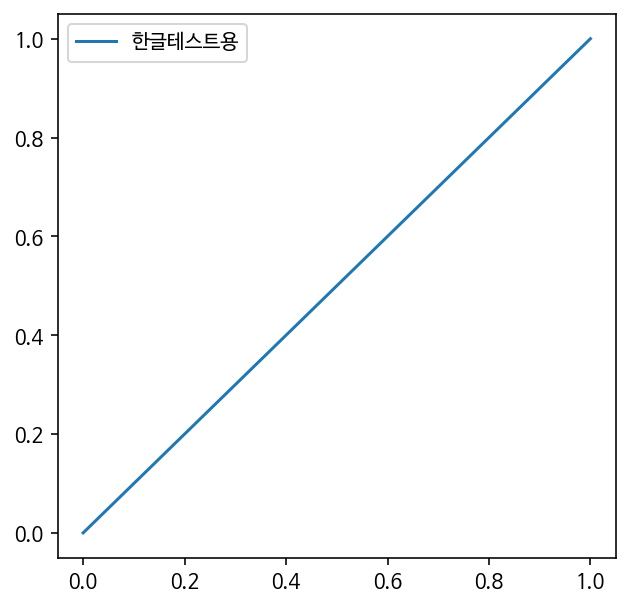

In [ ]:
#그래프 그림 (가로 5 세로5)
plt.figure(figsize=(5,5))
#X ,Y 좌표 설정
plt.plot([0,1], [0,1], label='한글테스트용')
#범례 표시
plt.legend()
#그래프 그림
plt.show()

# 데이터 시각화

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(
    {
      "학과":["컴공", "보안", "컴공", "보안", "컴공","컴공","보안","보안"],
      "학년":[ 1    ,  2    ,   2   ,   1,     2    ,  1,     1,     2],
      "영어":[90    ,  80   ,   100,    90,     70  , 100,    90,    80]
    }
)
pd.pivot_table(
    df,
    index = "학과",
    values = "영어"
)

,영어
학과,
보안,85
컴공,90


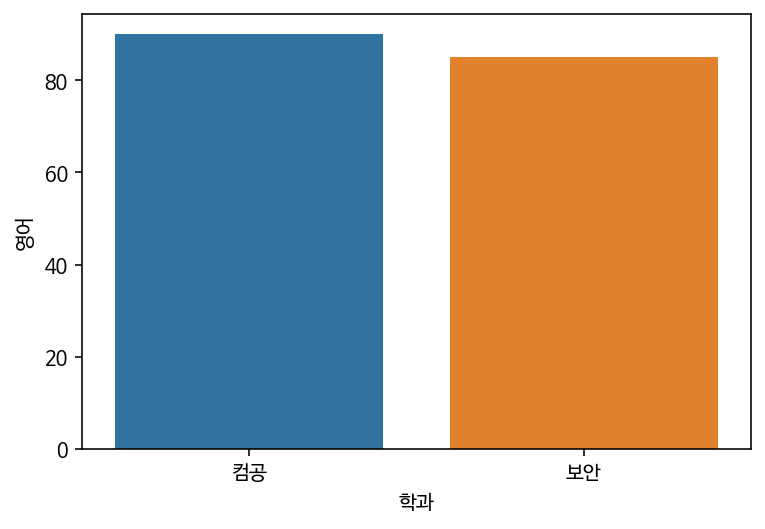

In [ ]:
import seaborn as sns

sns.barplot(data = df, x= "학과", y ="영어", ci=None)

In [ ]:
import seaborn as sns

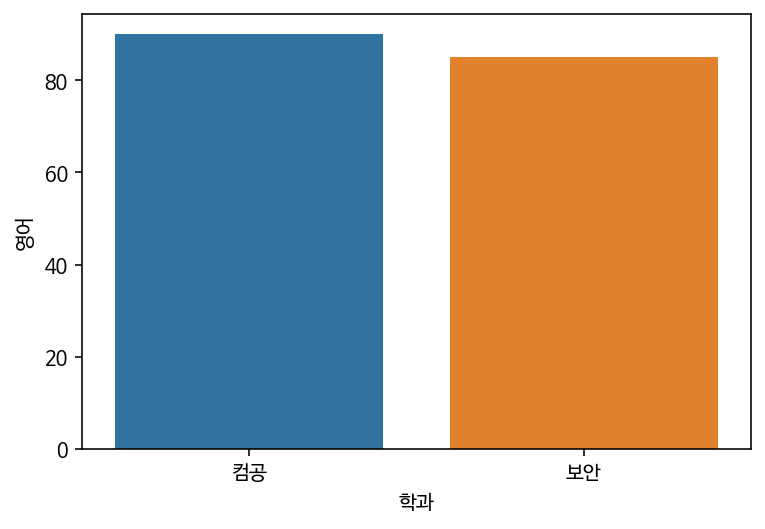

In [ ]:
sns.barplot(data=df, x="학과", y="영어", ci=None)

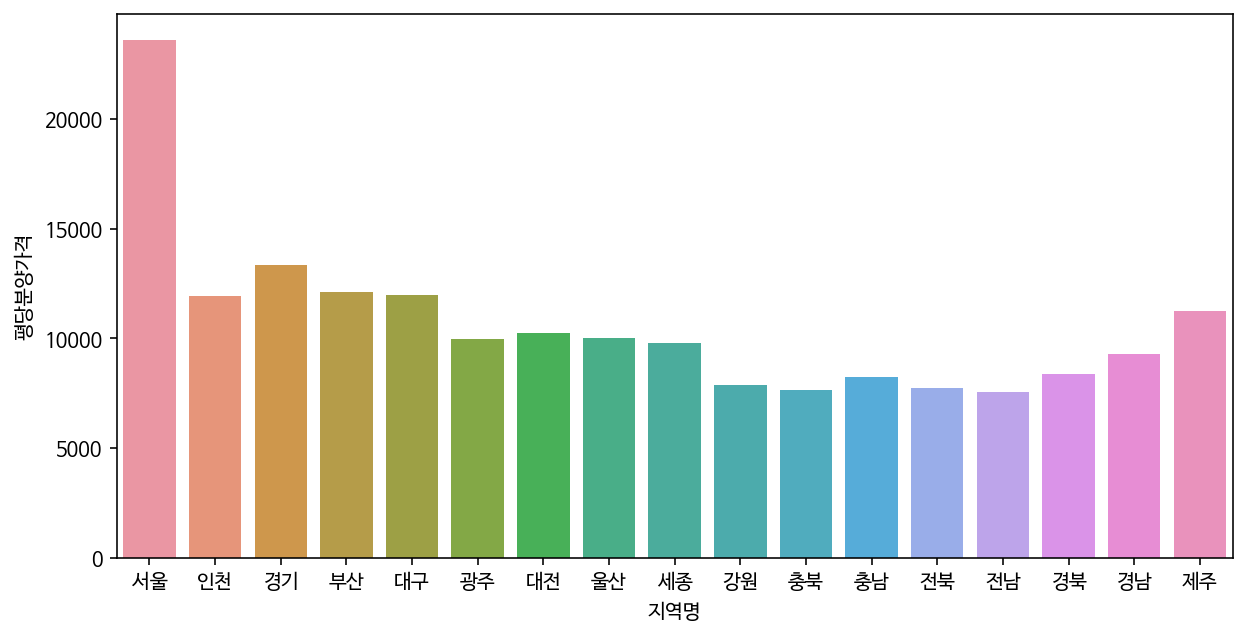

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_last, x="지역명", y="평당분양가격", ci=None)

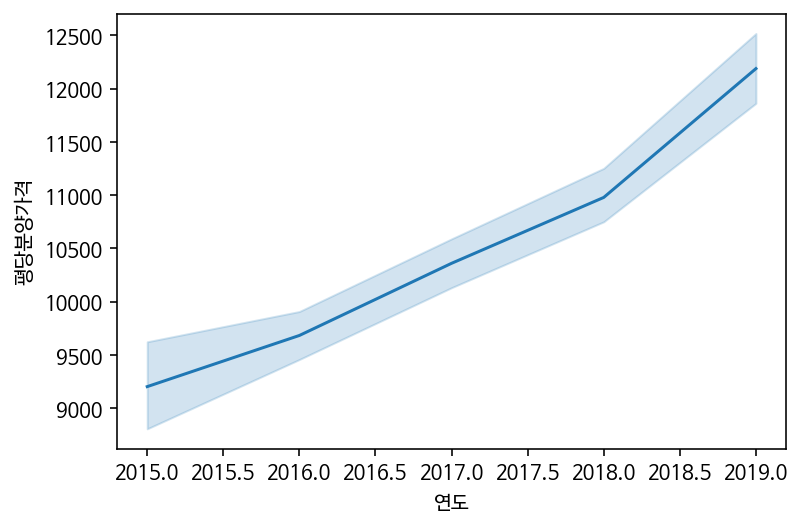

In [ ]:
sns.lineplot(data = df_last, x='연도', y ='평당분양가격')

In [ ]:
pd.pivot_table(
    df_last,
    index="연도",
    values="평당분양가격"
)

,평당분양가격
연도,
2015,9202.735802
2016,9683.025000
2017,10360.487653
2018,10978.938411
2019,12188.293092


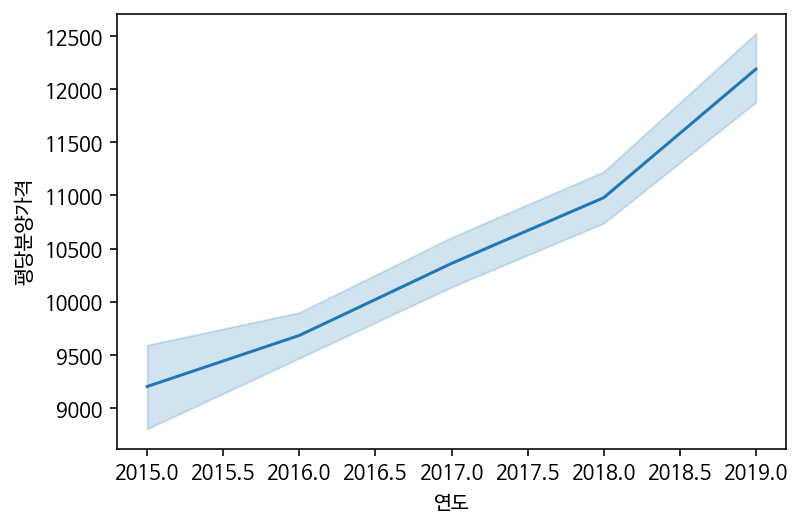

In [ ]:
sns.lineplot(data=df_last,  x="연도", y="평당분양가격")

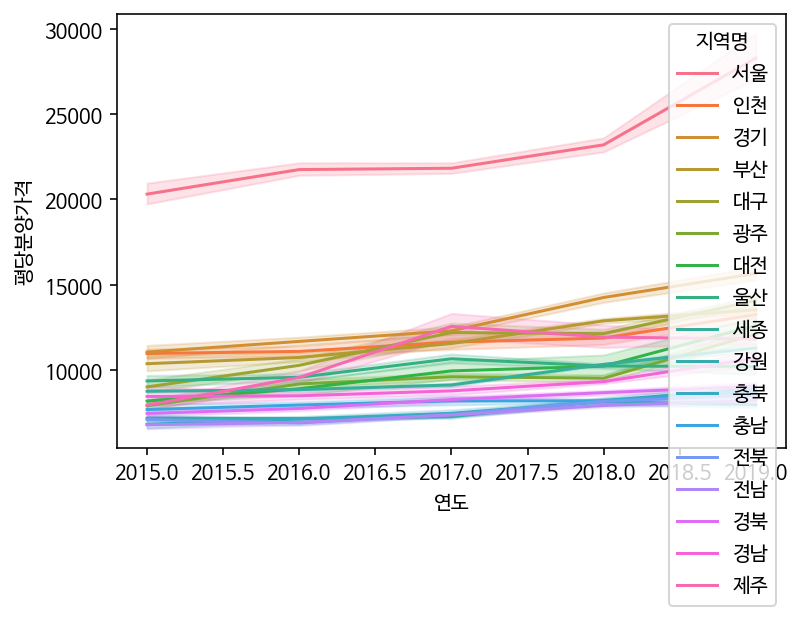

In [ ]:
sns.lineplot(data=df_last,  x="연도", y="평당분양가격", hue = "지역명") 
# hue는 그룹화 시켜줌

In [ ]:
plt.figure(figsize =(10, 5))
sns.lineplot(data=df_last,  x="연도", y="평당분양가격", hue = "지역명")
plt.show()

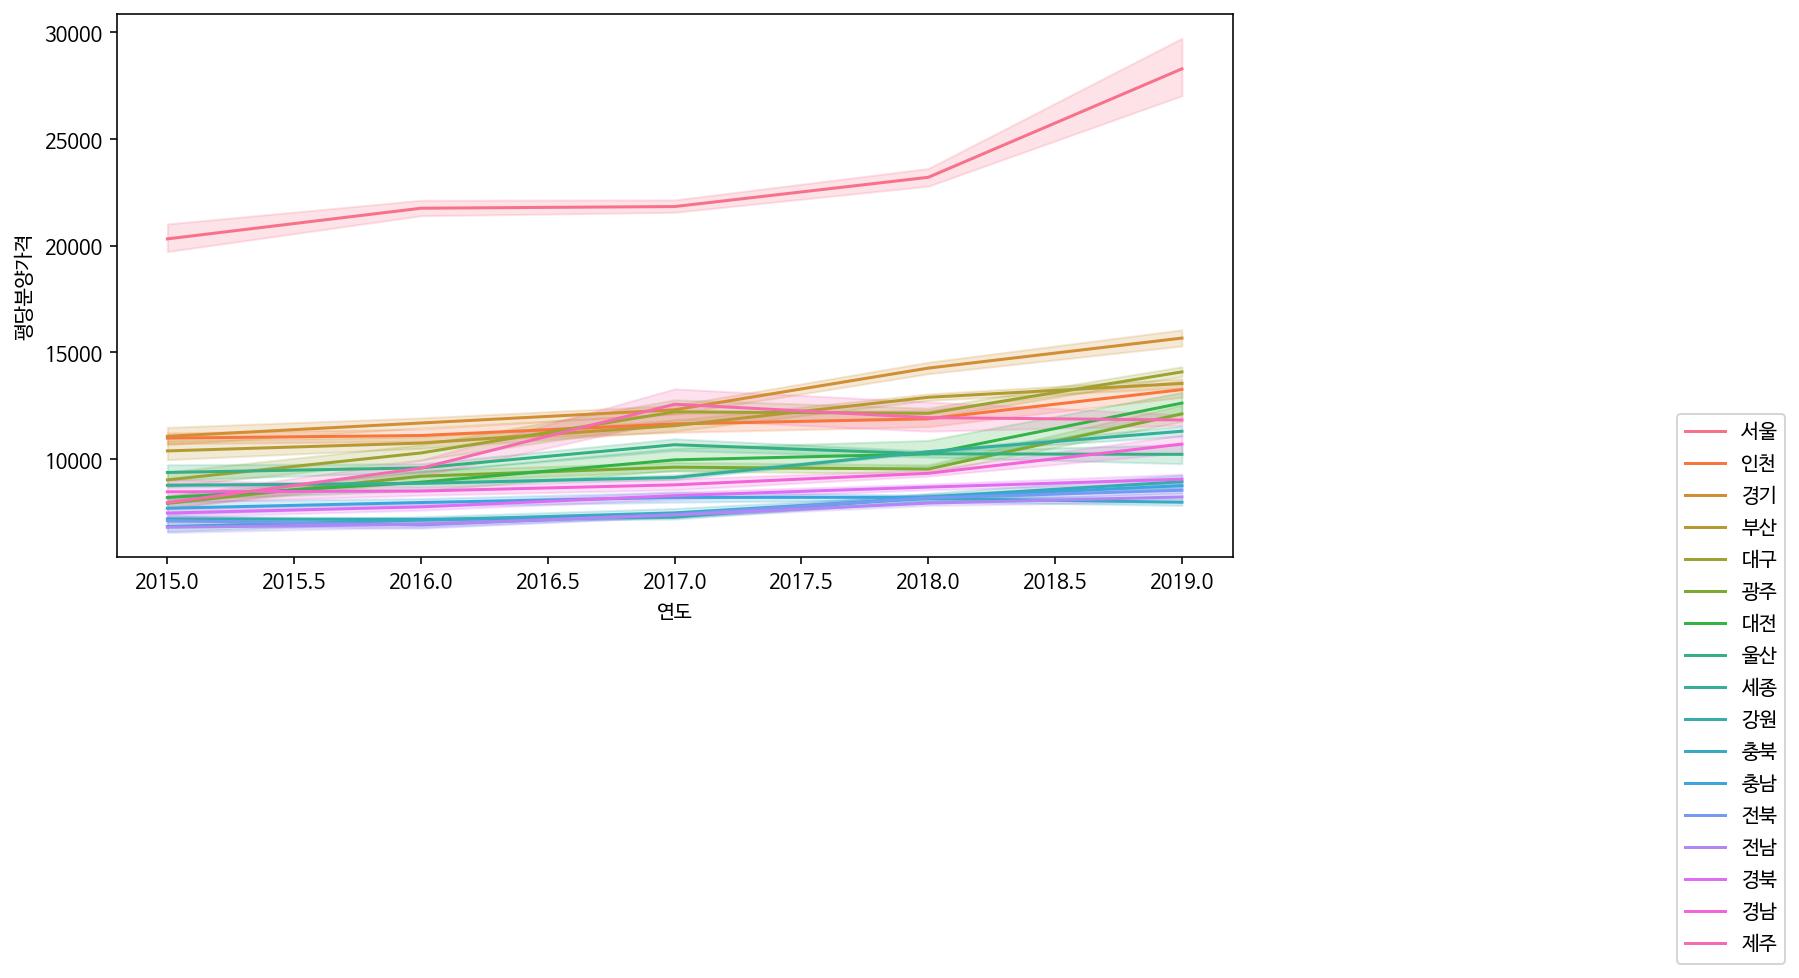

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last,  x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad = 20)  # 범례와 차트 사이여백

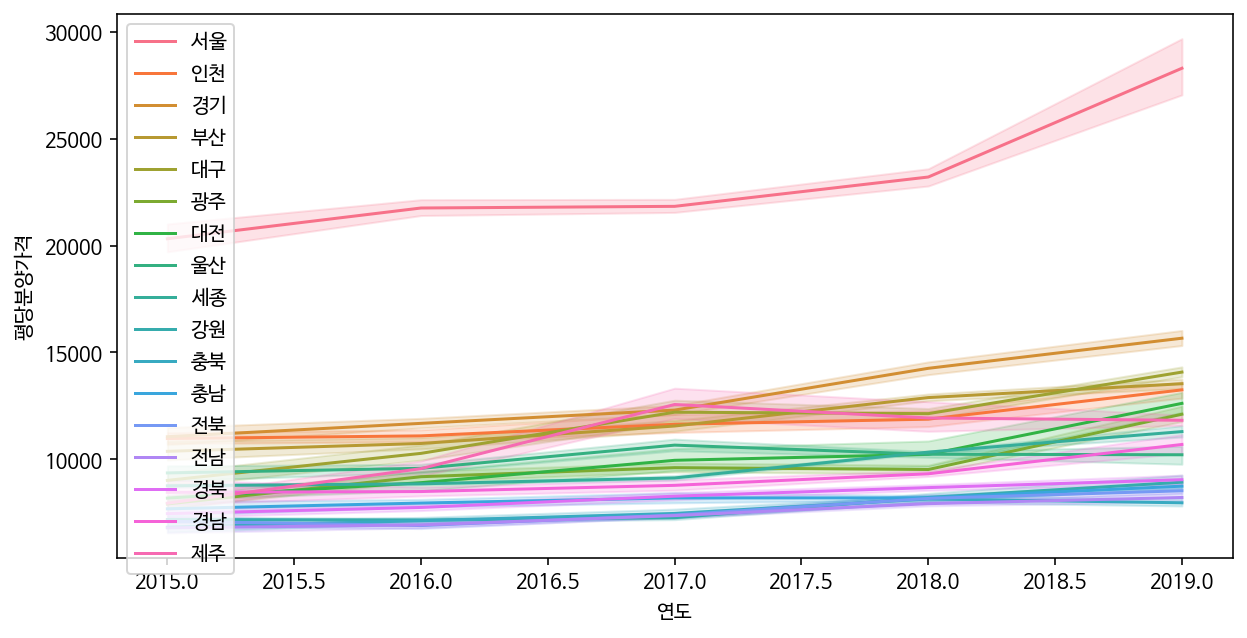

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_last,  x="연도", y="평당분양가격", hue="지역명")
plt.legend(loc ='upper left')

# 데이터프레임,난수,시각화


In [ ]:
lst1 = list(range(0, 101))


In [ ]:
import random
random.shuffle(lst1)
print(lst1)

[7, 20, 78, 45, 47, 94, 76, 79, 13, 16, 17, 92, 46, 12, 29, 84, 8, 14, 27, 25, 87, 62, 89, 61, 50, 64, 60, 3, 31, 63, 67, 36, 66, 73, 10, 9, 44, 83, 2, 97, 5, 26, 77, 54, 58, 40, 28, 88, 85, 86, 52, 19, 56, 37, 91, 32, 75, 4, 15, 65, 30, 34, 55, 23, 95, 93, 43, 53, 72, 39, 11, 42, 96, 6, 81, 71, 41, 82, 1, 70, 51, 33, 22, 35, 18, 90, 24, 74, 57, 38, 59, 49, 99, 80, 68, 21, 0, 100, 48, 69, 98]


In [ ]:
lst1.append(-300)
lst1.append(300)
print(lst1)

[7, 20, 78, 45, 47, 94, 76, 79, 13, 16, 17, 92, 46, 12, 29, 84, 8, 14, 27, 25, 87, 62, 89, 61, 50, 64, 60, 3, 31, 63, 67, 36, 66, 73, 10, 9, 44, 83, 2, 97, 5, 26, 77, 54, 58, 40, 28, 88, 85, 86, 52, 19, 56, 37, 91, 32, 75, 4, 15, 65, 30, 34, 55, 23, 95, 93, 43, 53, 72, 39, 11, 42, 96, 6, 81, 71, 41, 82, 1, 70, 51, 33, 22, 35, 18, 90, 24, 74, 57, 38, 59, 49, 99, 80, 68, 21, 0, 100, 48, 69, 98, -500, 300, -300, 300]


In [ ]:
df = pd.DataFrame({
    "컬럼1" : lst1

})
df.describe()

,컬럼1
count,105.000000
mean,46.190476
std,78.097953
min,-500.000000
25%,24.000000
50%,50.000000
75%,76.000000
max,300.000000


In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data = df, y= "컬럼1")
plt.show()

In [ ]:
plt.boxplot(df["컬럼1"])

In [ ]:
df["컬럼1"].quantile(0.25)
df["컬럼1"].quantile(0.75)
IQR = df["컬럼1"].quantile(0.75) - df["컬럼1"].quantile(0.25)
IQR

52.0

# 실습


## 그룹 객체만들기

In [ ]:
# 그룹 객체만들기 
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset("titanic")
df = titanic.loc[ : , ['age', 'sex', 'class', 'fare', 'survived']]

print("승객 수",len(df))
print(df.head())
print("=======================================")

grouped = df.groupby(["class"])
print(grouped)

for key,group in grouped:
  print("* key ", key)
  print("* number ", len(group))
  print(group.head())
  print("\n")

average = grouped.mean()
print(average)
print("=======================================")
group3 =  grouped.get_group('Third')
print(group.head())
print("=======================================")

grouped_two = df.groupby(["class", "sex"])

for key,group in grouped_two:
  print("* key ", key)
  print("* number ", len(group))
  print(group.head())
  print("\n")

average_two = grouped_two.mean()
print(average_two)
print("=======================================")
print(type(average_two))


print("=======================================")
group3f = grouped_two.get_group(('Third','female'))
print(group3f)

## 그룹연산 메소드(적용-결합 단계)

In [ ]:
# 그룹연산 메소드(적용-결합 단계)
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ["age", "sex", "class", "fare", "survived"]]

grouped = df.groupby(["class"])
std_all = grouped.std()
print(std_all)
print("=======================================")
print(type(std_all))
print("=======================================")
std_fare = grouped.fare.std()
print(std_fare)
print("=======================================")
print(type(std_fare))
print("=======================================")

## 피벗테이블

In [ ]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_colwidth', 20)

titanic = sns.load_dataset('titanic')
df = titanic.loc[:, ['age','sex','class','fare','survived']]
print(df.head())
print('=========================================')

pdf1 = pd.pivot_table(
    df,
    index = 'class',
    columns = 'sex',
    values = 'age',
    aggfunc = 'mean'

)
print(pdf1.head())

pdf2 = pd.pivot_table(
    df,
    index = 'class',
    columns = 'sex',
    values = 'survived',
    aggfunc = ['mean', 'sum']
)
print(pdf2.head())

pdf3 = pd.pivot_table(
    df,
    index = ['class', 'sex'],
    columns = 'survived',
    values = ['age', 'fare'],
    aggfunc = ['mean', 'max']
)

pd.set_option('display.max_columns', 10) # IPytion console 디스플레이 옵션 설정

print(pdf3.head())
print("=========================================")
print(pdf3.index)
print(pdf3.columns)

## 시각화

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

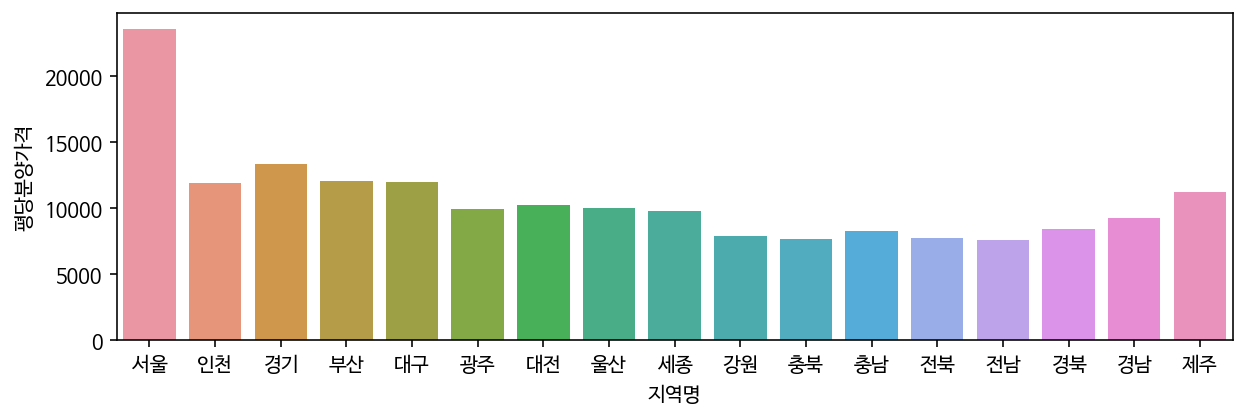

In [ ]:
plt.figure(figsize=(10, 3))
sns.barplot(data= df_last, x='지역명', y= '평당분양가격', ci =None)

In [ ]:
import pandas as pd
dic1 = {
    "년" : [2017, 2018],
    "F" : [0.38087, 0.372857],
    "M" : [0.619113, 0.627143]
}
df = pd.DataFrame(dic1)
df

,년,F,M
0,2017,0.380870,0.619113
1,2018,0.372857,0.627143


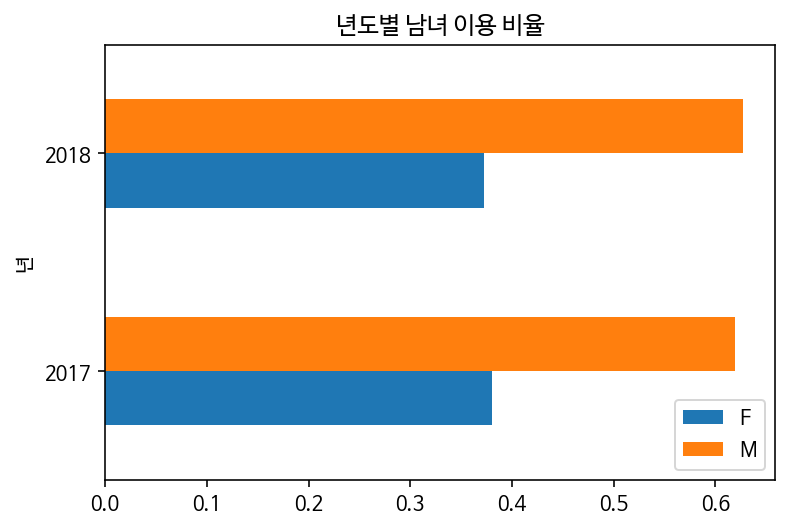

In [ ]:
df = df.set_index("년")
df.plot(kind = 'barh', title ='년도별 남녀 이용 비율')

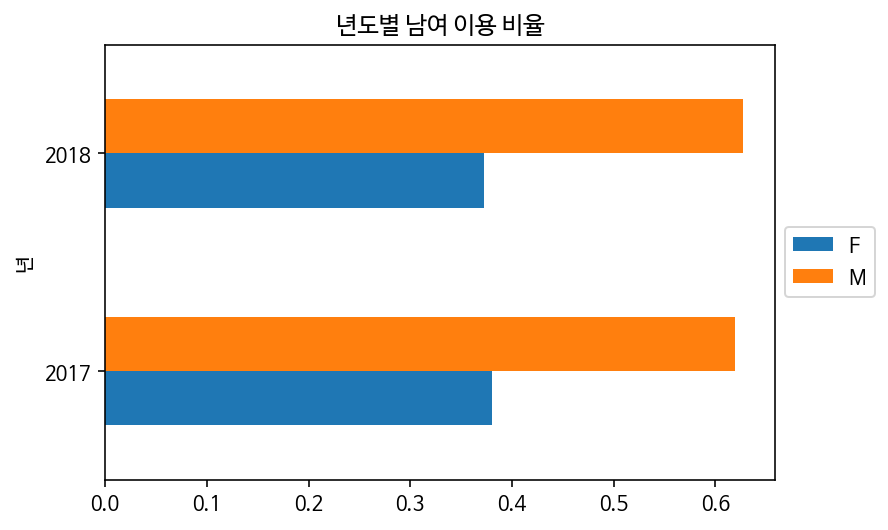

In [ ]:
df.plot(kind = 'barh', title = "년도별 남여 이용 비율")
plt.legend(loc = 'center left', bbox_to_anchor=(1, 0.5))

# 데이터 이상치 탐지(data outlier detection)


데이터의 이상치 : 일반적인 데이터 패턴과 다르게 매우 이상한 패턴을 가지고 있는 데이터

- 모델 입장에서 데이터의 패턴을 학습해야하는데 이상치 데이터들 떄문에 뜬금없는 패턴 학습해버림, 따라서 이상치 탐지는 필수

- 대표적인 방법은 IQR (Inter Qunatile Range)이 있다. IQR은 사분위 값의 편차를 이용, boxplot으로 확인

- 25% 지점 Q1, 50% 지점 Q2, 75%지점 Q3 ,100% Q4

여기서 IQR은 Q1 ~ Q3 지점을 뜻함
즉, IQR = Q3 - Q1

IQR을 이용해 이상치(outlier)를 탐지하는 것은 IQR에 1.5를 곱해서 구함

- IQR * 1.5를 곱해서 이를 Q3에 더하고
- IQR * 1.5를 값해서 이를 Q1 에서 뺸다.

Q3에 더한값을 최댓값 , Q1에서 뺸 값을 최소값

- 최댓값, 최소값 보다 크거나, 작은 값들을 이상치 라고 한다.

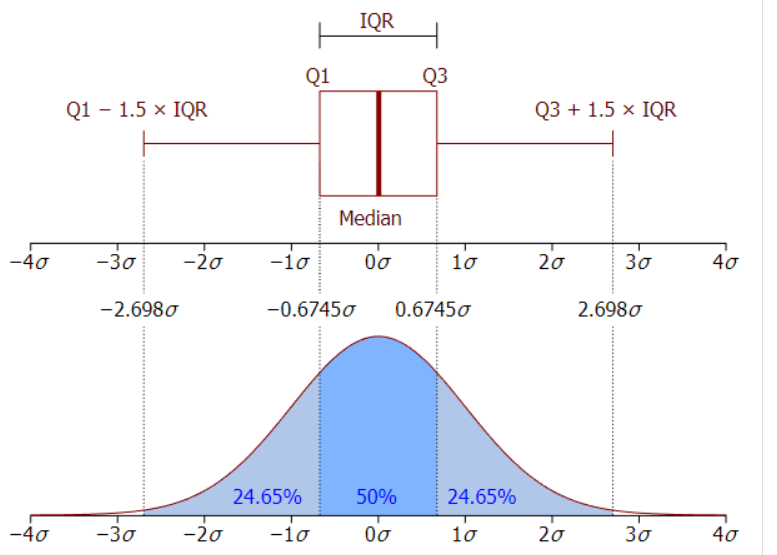

## 이상치 기초

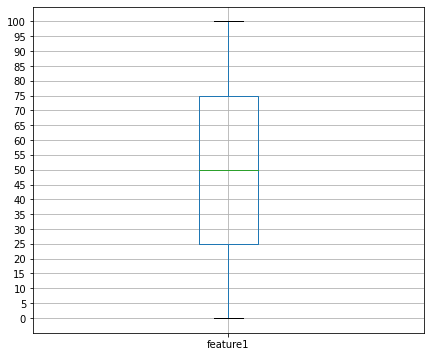

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 일정하게 0부터 100까지 총 101개 숫자를 만든다
# linspace(시작,끝,시작과 끝 사이 몇 개의 일정한 가격으로 요소넣을것인가)
xs = np.array(np.linspace(start=0, stop=100, num=101))

# xs = np.array([3,30,35,40,45,48,49,50,51,52,53,55,60,65,90,95])
df = pd.DataFrame(xs, columns=['feature1'])

from scipy import stats
zscore_threshold = 1.8

# outliers를 출력한다
df[(np.abs(stats.zscore(df)) > zscore_threshold).all(axis=1)].values.ravel()


# outliers제외하고 최소값, 백분위25, 백분위50, 백분위75, 최대값을 출력한다
# abs() : 절대값을 구하는 함수.
# stats.zscore :  표준편차구하기 // 평균이랑 얼마나 차이나는가? 를 확인 하려 하는듯
# 즉 평균과 오차의 절대값이 임계값을 넘지않는(이상치를 넘지 않는)
# 최소, 백분위 25, 50,75, 최대값을 출력한다.  
# interpolation = 'nearest' : 추정값이 아닌 가장 가까운 실제 값
# 이 선택적 매개 변수는 원하는 백분위 수가 두 데이터 포인트 i < j 사이에있을 때 사용할 보간 방법을 지정 . -> 뭔소리누


np.percentile(df[(np.abs(stats.zscore(df)) < zscore_threshold).all(axis=1)].values.ravel(),\
              [0, 25, 50, 75, 100], interpolation='nearest')
			  
plt.figure(figsize=(7, 6)) # 크기 지정
boxplot = df.boxplot(column=['feature1'])
plt.yticks(np.arange(0, 101, step=5))
plt.show()

## 이상치 고급


https://lsjsj92.tistory.com/556

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # 경고 메시지 숨기기
%matplotlib inline

In [ ]:
card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI_허현준/dataset/creditcard.csv')

In [ ]:
print(card_df.shape)
print("===============================================================")
print(card_df.info())
print("===============================================================")
print(card_df.head())

- Time 은 데이터 생성 관련한 작업용 속성으로 제거한다.
- V1~V28 은 kaggle 데이터 설명에서 사용자 ID 및 중요한 기능을 보호하기 위한 PCA 차원 감소의 결과 라고 되어있다. 즉, 피처의 의미를 알 수 없다.
- Amount 는 신용카드 트랜잭션의 금액을 의미한다.
- Class 는 0이면 정상, 1이면 사기 트랜잭션이다.

In [ ]:
corr = card_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_properties(**{'font-size': '0pt'})

# df.style.background_gradient(cmap='coolwarm')을 사용해 숫자에 따라 다른색
# .set_properties(**{'font-size': '0pt'}) : 숫자 모두 제거


In [ ]:
f, axes = plt.subplots(ncols =2, figsize=(15, 8))

sns.boxplot(x = 'Class', y = 'V17', data = card_df, ax=axes[0])
axes[0].set_title("V17 vs Class")

sns.boxplot(x = 'Class', y ="V14", data = card_df, ax = axes[1])
axes[1].set_title('V14 vs Class')

In [ ]:
fig , ax = plt.subplots(ncols =2 , figsize=(15, 8))

sns.boxplot(data = card_df, ax= ax[0], x = "Class" ,y ="V20")
ax[0].set_title("V20 vs Class")

sns.boxplot(data = card_df, ax =ax[1], x = "Class", y= "V21")
ax[1].set_title("V21 vs Class")

In [ ]:
df_copy = card_df.copy()

In [ ]:
print(np.version.version)

1.16.5


In [ ]:
'1.16.5'

In [ ]:
!pip install numpy==1.16.5

In [ ]:
def romove_outlier_test(df, column):
  fraud_column_data = df[column]  
  quan_25 = np.percentile(fraud_column_data.values, 25)
  quan_75 = np.percentile(fraud_column_data.values, 75)

  iqr = quan_75 - quan_25
  iqr = iqr * 1.5
  highest = quan_75 + iqr
  lowest = quan_25 - iqr
  outlier_index = fraud_column_data[(fraud_column_data < lowest) | (fraud_column_data > highest)].index
  print(len(outlier_index))
  df.drop(outlier_index, axis = 0, inplace =True)
  print(df.shape)
  return df

In [ ]:
df_copy = romove_outlier_test(df_copy, 'V14')

14149
(270658, 31)
